### Simple Reccommedations

Importing necessary libraries

In [77]:
import pandas as pd
import numpy as np

In [78]:
anime = pd.read_csv('/content/drive/My Drive/anime data/anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Cleaning up the name column from non-alphanumeric characters


In [79]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [80]:
#converting the name column into string datatype
anime['name'] = anime['name'].astype('str')

In [81]:
#creating the function to remove the characters
import re
def clean_up(s):
  new_s = re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(s))
  return new_s


In [82]:
anime['name'] = anime['name'].apply(clean_up)

In [83]:
#after clean-up
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [84]:
ratings = pd.read_csv('/content/drive/My Drive/anime data/rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [85]:
anime.shape

(12294, 7)

In [86]:
ratings.shape

(7813737, 3)

In [87]:
#renaming rating in anime df rating to average rating
anime.rename(columns={'rating':'average_rating'}, inplace=True)

In [88]:
anime.head()

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Merging both the anime and rating dataframes

### Important points to grasp about the datasets
In the anime.csv file, **anime_id** is **unique** for each row.
In the rating.csv file, **anime_id** is **unique**, but **user_id** is **not unique**. 
When we merge both, **user_id** becomes **unique**, and anime_id is no longer.

In [89]:
#we merge based on anime_id cus they're both common in the 2 dataframes
df_merged = pd.merge(ratings,anime,on='anime_id')

In [90]:
df_merged.shape

(7813727, 9)

In [91]:
df_merged.head() 

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [92]:
#shuffling the dataframe
df_merged = df_merged.sample(n=len(df_merged), random_state=42)

In [93]:
#we're going to use only 200,000 of the dataset to avoid RAM issues
df_merged = df_merged[:200000]

In [94]:
#checking out the new head of the dataframe after shuffling
df_merged.head()

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
2375120,6155,5081,7,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire",TV,15,8.39,482268
3188893,67150,59,7,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,7.57,266846
4769282,19614,7311,9,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
6887031,38937,158,7,Mariasama ga Miteru,"Drama, Romance, Shoujo, Shoujo Ai, Slice of Life",TV,13,7.48,33989
1397707,27133,9989,8,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835


### EDA - Visualizing Imports

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Creating ratings dataframe with average rating and number of ratings

In [96]:
#getting the average rating of each anime and sorting in descending order
df_merged.groupby('name')['average_rating'].mean().sort_values(ascending=False).head()

name
Kimi no Na wa.                                            9.37
Fullmetal Alchemist Brotherhood                           9.26
Steins;Gate                                               9.17
Gintama039;                                               9.16
Haikyuu Karasuno Koukou VS Shiratorizawa Gakuen Koukou    9.15
Name: average_rating, dtype: float64

In [97]:
#getting the number of users that voted (ie the number of times each anime_id appeared in the dataframe)
df_merged.groupby('name')['members'].count().sort_values(ascending=False).head()

name
Death Note                        969
Sword Art Online                  815
Angel Beats                       771
Shingeki no Kyojin                758
Code Geass Hangyaku no Lelouch    706
Name: members, dtype: int64

Creating a dataframe of anime name and the count of their ratings

In [98]:
new_df = pd.DataFrame(df_merged.groupby('name')['members'].count())
new_df.rename(columns={'members':'count of votes'}, inplace=True)
new_df.head()

,count of votes
name,
.hackG.U. Returner,21
.hackG.U. Trilogy,22
.hackG.U. Trilogy Parody Mode,11
.hackGift,24
.hackIntermezzo,25


Merge the above dataframe to df_merged

In [99]:
#we merge based on name cus they're both common in the 2 dataframes
df_merged = pd.merge(new_df,df_merged,on='name')

In [100]:
df_merged.head()

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,.hackG.U. Returner,21,5680,2928,6,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
1,.hackG.U. Returner,21,35745,2928,2,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
2,.hackG.U. Returner,21,29698,2928,8,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
3,.hackG.U. Returner,21,24438,2928,4,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
4,.hackG.U. Returner,21,49146,2928,7,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


Plotting histogram wrt number of ratings

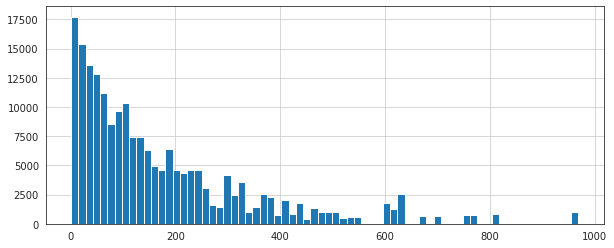

In [101]:
#x-axis is number of votes, y-axis is frquency
plt.figure(figsize=(10,4))
df_merged['count of votes'].hist(bins=70)

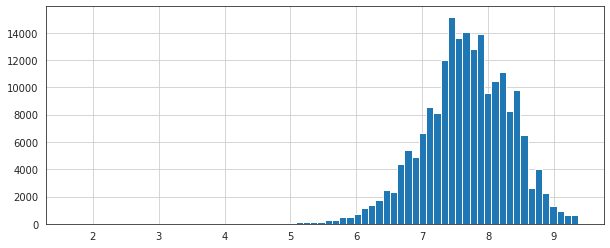

In [102]:
#x-axis is average rating and y-axis is frequenct of the rating
plt.figure(figsize=(10,4))
df_merged['average_rating'].hist(bins=70)

Uing the Weighted Average Formula AND the members column based on popularity
WR = (vR + mC/v+m) where:
- v is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [103]:
#looking at the member table column before normalizing
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,.hackG.U. Returner,21,5680,2928,6,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
1,.hackG.U. Returner,21,35745,2928,2,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412
2,.hackG.U. Returner,21,29698,2928,8,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,15412


In [104]:
df_merged.members.max()

1013917

In [105]:
#normalizing the members column to a scale of 0-10
from sklearn import preprocessing

x = df_merged['members'].values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
x_scaled = min_max_scaler.fit_transform(x)
df_merged['members'] = pd.DataFrame(x_scaled)

In [106]:
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,.hackG.U. Returner,21,5680,2928,6,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,0.151567
1,.hackG.U. Returner,21,35745,2928,2,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,0.151567
2,.hackG.U. Returner,21,29698,2928,8,"Adventure, Drama, Fantasy, Game, Magic, Sci-Fi",OVA,1,6.91,0.151567


In [107]:
# Calculate the mean vote of average rating column
C = df_merged['average_rating'].mean()
C

7.656129550001002

Calculating the number of votes, m, received by a movie in the 90th percentile.

In [108]:
m = df_merged['count of votes'].quantile(0.90)
print(m)

407.0


using m to filter out anime qualified for the model. ie anime with rating count >= m

In [137]:
q_anime = df_merged.copy().loc[df_merged['count of votes'] >= m]
q_anime.shape

(20023, 10)

In [139]:
df_merged.shape

(200000, 10)

In [140]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['count of votes']
    R = x['average_rating']
    P = x['members']
    # Calculation based on the IMDB formula
    return (0.5*(v/(v+m) * R) + (m/(m+v) * C)) + (0.5*(P))

In [141]:
#Define a feature 'score' and calculate its value with `weighted_rating()`
q_anime['score'] = q_anime.apply(weighted_rating, axis=1) 

In [151]:
#Sort anime based on score calculated above
q_anime = q_anime.sort_values('score', ascending=False)

#Print the top 15 movies
q_anime[['name', 'count of votes', 'average_rating', 'score']].head(20)

,name,count of votes,average_rating,score
42106,Death Note,969,8.71,10.331424
42144,Death Note,969,8.71,10.331424
42146,Death Note,969,8.71,10.331424
42147,Death Note,969,8.71,10.331424
42148,Death Note,969,8.71,10.331424
42149,Death Note,969,8.71,10.331424
42121,Death Note,969,8.71,10.331424
41817,Death Note,969,8.71,10.331424
41466,Death Note,969,8.71,10.331424
41815,Death Note,969,8.71,10.331424
